In [117]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [72]:
f_mean = 22

In [73]:
print(f_mean)

22


In [74]:
f_cov = 0.10

In [75]:
f_std = f_mean * f_cov

In [76]:
print(f_std)

2.2


Monte Carlo simulations

In [77]:
simulations_number = 100_000 #assumed

In [78]:
np.random.seed(2)

In [79]:
u = np.random.uniform(low=0, high=1, size=simulations_number) #probability realisations
u[0:5]

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ])

In [80]:
x = stats.norm.ppf(u) #inverse of the normal distribution
x[0:5]

array([-0.16113153, -1.9443566 ,  0.12480864, -0.16283953, -0.20095264])

In [81]:
r = x*f_std + f_mean #vector of realisations
r[0:5]

array([21.64551063, 17.72241548, 22.27457902, 21.64175304, 21.55790419])

In [82]:
compressive_resistance_distribution = stats.norm.pdf(np.sort(r), f_mean, f_std)
#https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
#https://www.askpython.com/python/normal-distribution
#https://vitalflux.com/normal-distribution-explained-python-examples/

In [83]:
# x_label = input()
# y_label = input()

Text(0, 0.5, 'Probability density')

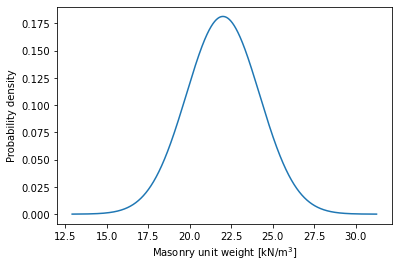

In [103]:
plt.plot(np.sort(r), compressive_resistance_distribution)
plt.xlabel("Masonry unit weight [kN/m$^3$]")
#plt.xlabel(x_label)
plt.ylabel("Probability density")
#plt.ylabel(y_label)

Convergence assessment (see Ballio and Guadagnini, 2004)

In [85]:
realisations_list = []
mean_list = []
var_list = []

In [86]:
# def random_choice(sample_vector, sample_size):
    
#     r_sample_size = np.random.choice(sample_vector, size=sample_size, replace=False, p=None)
#     r_sample_size_mean = np.mean(r_sample_size)
#     r_sample_size_std = np.std(r_sample_size)

#     mean_list.append(r_sample_size_mean)
#     std_list.append(r_sample_size_std)
    
#     return r_sample_size, mean_list, std_list

In [87]:
# random_choice(r, simulations_number)

In [88]:
def random_choice(sample_vector, sample_size):
    
    for i in range(sample_size):
        # print(i+1)
        r_sample_size = np.random.choice(sample_vector, size=i+1, replace=False, p=None)
        r_sample_size_mean = np.mean(r_sample_size)
        r_sample_size_var = np.var(r_sample_size)

        realisations_list.append(r_sample_size)
        mean_list.append(r_sample_size_mean)
        var_list.append(r_sample_size_var)
    
    #return realisations_list, mean_list, var_list

In [89]:
random_choice(r, simulations_number) #it takes 4m 32s on average

In [90]:
n = np.arange(1,simulations_number+1, 1)

#print(n)

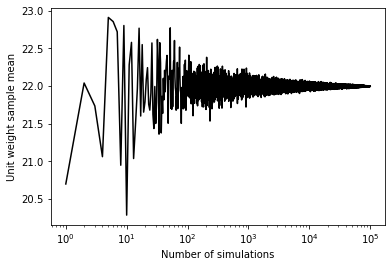

In [91]:
plt.plot(n, mean_list, color='black') #https://stackoverflow.com/questions/41709257/how-to-change-the-plot-line-color-from-blue-to-black#:~:text=The%20usual%20way%20to%20set,explicitely%20stating%20the%20color%20argument.
#plt.xticks(range(1,iterations+1)) #https://stackoverflow.com/questions/52229875/how-to-force-matplotlib-to-show-values-on-x-axis-as-integers
plt.xticks(n) #https://towardsdatascience.com/change-tick-frequency-matplotlib-axis-6af2c6bce1ea
plt.xlabel("Number of simulations")
plt.ylabel("Unit weight sample mean")

plt.xscale('log') #https://stackoverflow.com/questions/773814/plot-logarithmic-axes

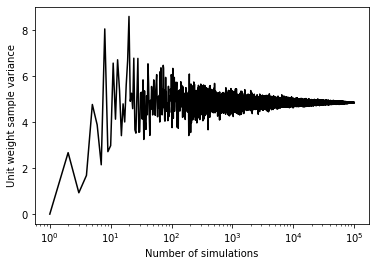

In [92]:
plt.plot(n, var_list, color='black')
plt.xticks(range(1,simulations_number+1))
plt.xlabel("Number of simulations")
plt.ylabel("Unit weight sample variance")

plt.xscale('log')

Text(0, 0.5, 'Probability density')

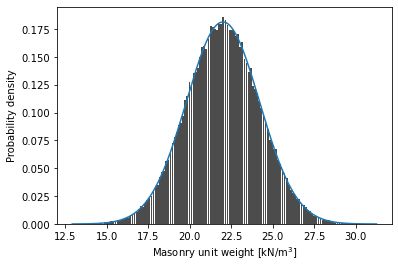

In [102]:
#https://realpython.com/python-histograms/
n, bins, patches = plt.hist(x=r, bins='auto', color='black', alpha=0.7, rwidth=0.85, density=True)

plt.plot(np.sort(r), compressive_resistance_distribution)
plt.xlabel('Masonry unit weight [kN/m$^3$]')
plt.ylabel('Probability density')
# plt.xlabel(x_label_pdf)
# plt.ylabel(y_label_pdf)

In [114]:
realisations_vector = np.transpose(np.sort(r))

In [115]:
np.sort(r).shape[0]

100000

In [118]:
realisations_series = pd.Series(realisations_vector)

In [119]:
realisations_header = 'masonry_unit_weight_realisations'

In [122]:
realisations_vector_file_name = 'masonry_unit_weight_realisations.csv'

In [129]:
realisations_series.to_csv(realisations_vector_file_name, header = [realisations_header], index = False)

Moments calculation

In [94]:
second_moment_list = []

In [95]:
# for i in range(simulations_number):
#     print(i)
#     print(realisations_list[i])

In [96]:
def second_moment_calculation(realisations):
    for i in range(simulations_number):
        sample_second_moment=stats.moment(realisations[i], moment=2)

        second_moment_list.append(sample_second_moment)

        #print(second_moment_list)    #return second_moment_list

In [97]:
second_moment_calculation(realisations_list)

In [98]:
sample_mean_cov_list = []
r_array = np.array(r)
sample_mean = np.mean(r_array)

In [99]:
def sample_mean_cov_calculation(second_moments):

    for i in range(simulations_number):
        sample_mean_cov = second_moments[i]/sample_mean
        
        sample_mean_cov_list.append(sample_mean_cov)

    #return sample_mean_cov_list

In [100]:
sample_mean_cov_calculation(second_moment_list)

ValueError: x and y must have same first dimension, but have shapes (144,) and (100000,)

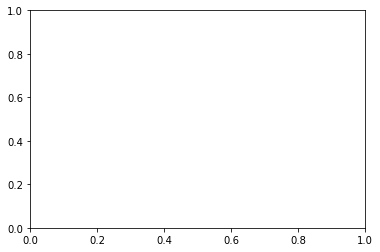

In [101]:
plt.plot(n, sample_mean_cov_list, color='black')
plt.xticks(range(1,simulations_number+1))
plt.xlabel("Number of simulations")
plt.ylabel("Coefficient of variation of sample mean")

plt.xscale('log')

In [ ]:
fourth_moment_list = []

In [ ]:
def fourth_moment_calculation(realisations):
    for i in range(simulations_number):
        sample_fourth_moment=scipy.stats.moment(realisations[i], moment=4)

        fourth_moment_list.append(sample_fourth_moment)

        #print(second_moment_list)
    #return fourth_moment_list

In [ ]:
fourth_moment_calculation(realisations_list)

In [ ]:
sample_variance_cov_list = []
sample_variance = np.var(r_array)

In [ ]:
def sample_variance_cov_calculation(fourth_moments):
    for i in range(simulations_number):
        sample_variance_cov = fourth_moments[i]/sample_variance

        sample_variance_cov_list.append(sample_variance_cov)

    #return sample_mean_cov_list

In [ ]:
sample_variance_cov_calculation(fourth_moment_list)

In [ ]:
plt.plot(n, sample_variance_cov_list, color='black')
plt.xticks(range(1,simulations_number+1))
plt.xlabel("Number of simulations")
plt.ylabel("Coefficient of variation of sample variance")

plt.xscale('log')

In [ ]:
masonry_unit_weight_realisations = r
convergence_simulation_number = 100_000

In [ ]:
%store masonry_unit_weight_realisations
%store convergence_simulation_number